<a href="https://colab.research.google.com/github/ibacaraujo/How-to-Generate-Music/blob/master/build_d2l_3_7_weight_decay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weight Decay

## Install libraries

In [1]:
!pip install d2l==1.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
   

## Import libraries

In [2]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

## Norms and Weight Decay

Loss was given by.

$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

Penalize the size of the weight vector.

$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2.$$

Minibatch stochastic gradient descent updates
for $\ell_2$-regularized regression as follows.

$$\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}$$

## High-Dimensional Linear Regression

The benefits of weight decay
through a simple synthetic example.

First, we generate some data as before.

**$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \textrm{ where }
\epsilon \sim \mathcal{N}(0, 0.01^2).$$**

In [3]:
class Data(d2l.DataModule):
  def __init__(self, num_train, num_val, num_inputs, batch_size):
    self.save_hyperparameters()
    n = num_train + num_val
    self.X = torch.randn(n, num_inputs)
    noise = torch.randn(n, 1) * 0.01
    w, b = torch.ones(num_inputs, 1) * 0.01, 0.05
    self.y = torch.matmul(self.X, w) + b + noise

  def get_dataloader(self, train):
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader([self.X, self.y], train, i)

## Implementation from Scratch

### Defining $\ell_2$ Norm Penalty

In [4]:
def l2_penalty(w):
  return (w ** 2).sum() / 2

### Defining the Model

In [5]:
class WeightDecayRegression(d2l.LinearRegressionScratch):
  def __init__(self, num_inputs, lr, lambd, sigma=0.01):
    super().__init__(num_inputs, lr, sigma)
    self.save_hyperparameters()

  def loss(self, y_hat, y):
    return super().loss(y_hat, y) + self.lambd * l2_penalty(self.w)

Linear regression model with weight decay is the same but with the loss considering the additive term of the penalty multiplied by the lambda term.

In [13]:
data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)

def train_scratch(lambd):
  model = WeightDecayRegression(num_inputs=200, lambd=lambd, lr=0.01)
  model.board.yscale = 'log'
  trainer.fit(model, data)
  print(f"L2 norm of w: {float(l2_penalty(model.w))}.")

### Training without Regularization

L2 norm of w: 0.012456808239221573.


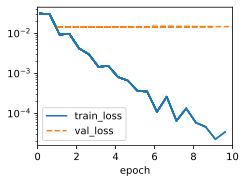

In [11]:
train_scratch(0)

### Using Weight Decay

L2 norm of w: 0.0013579257065430284.


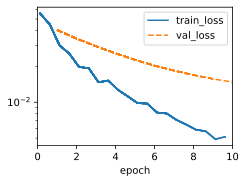

In [14]:
train_scratch(3)